___
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=" width="400px" height="180px" />


# <font color= #bbc28d> **EXAMEN 3** </font>
#### <font color= #2E9AFE> `Proyecto 3 - Modelo para predecir el nivel de severidad de una enfermedad`</font>
- <Strong> -- </Strong>
- <Strong> Fecha </Strong>: 26/03/2025



___

<p style="text-align:right;"> Imagen recuperada de: https://media.istockphoto.com/id/1493874000/es/vector/ilustraci%C3%B3n-de-medicina-preventiva.jpg?s=612x612&w=0&k=20&c=A3E4XsVlmY0Q7P1WQJFBenx2uqldGBL2BLK0cTKbWT0=</p>

## <font color= #bbc28d> **Objetivo** </font>
El objetivo del proyecto es utilizar técnicas de aprendizaje automático supervisado para construir un modelo capaz de predecir el `nivel de severidad` de una enfermedad. Se utilizará una base de datos que contiene información clínica y factores de riesgo relacionados a dicha enfermedad. 

## <font color= #bbc28d> **Caso 1 - Regresión Logística** </font>

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Cargar los datos
df = pd.read_csv('Datasets/train_data.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Datasets/train_data.csv'

In [3]:
# Comprobar si existen valores nulos
df.isnull().sum()

Age         0
Sex         0
TCh         0
HCh         0
LCh         0
Tr          0
BPS         0
Sm          0
Diabetes    0
Pred        0
dtype: int64

No contamos con datos nulos, por lo que no habrá que realizar alguna imputación.

In [4]:
# Seleccionar solo columnas numéricas
df_numericas = df.select_dtypes(include='number').columns

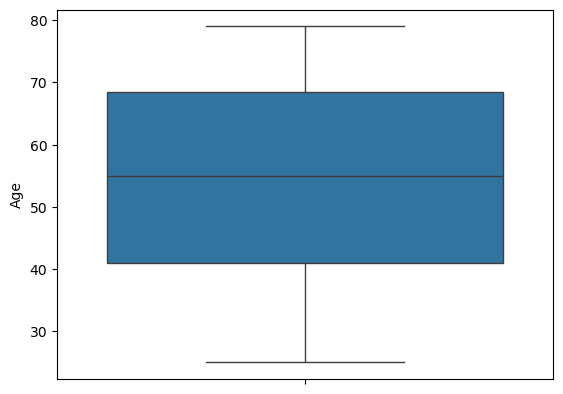

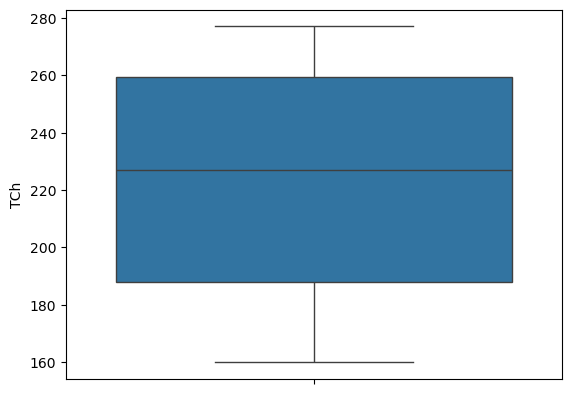

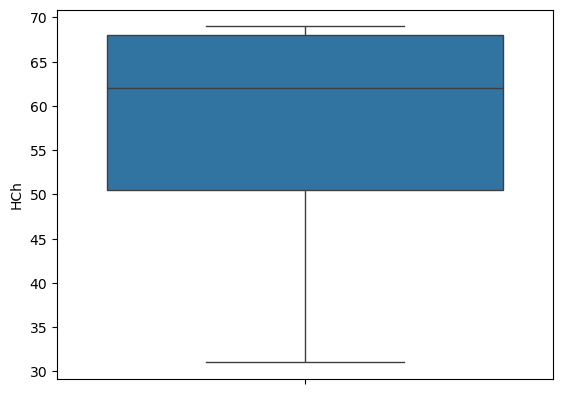

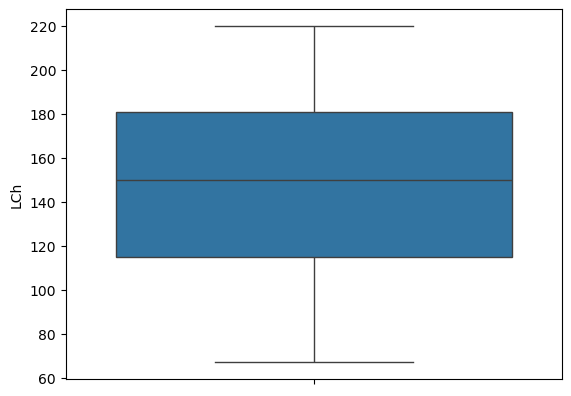

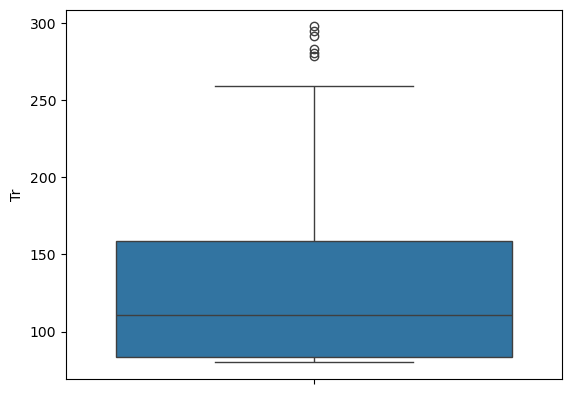

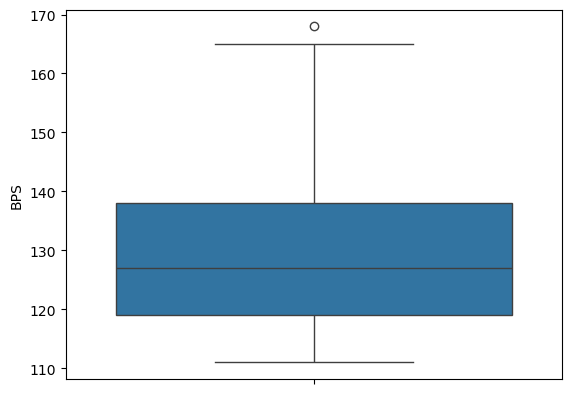

In [5]:
# Verificar si hay datos atípicos
for i in df_numericas:
    sns.boxplot(df[i])
    plt.show()

Contamos con algunos datos atípicos en la columna `Tr` la cuál creemos que hace referencia a los `Triglicéridos`. Los valores atípicos rondan entre los 250 y los 300 que si bien son niveles **altos** e irregulares en personas "sanas", no son valores imposibles de obtener en un estudio si es que cuentas con otro tipo de factores como obesidad o diabetes, entre otras más, por lo que no los trataremos y veremos que tal le va al modelo.

In [6]:
# Medidas de ditribución básica
df.describe()

,Age,TCh,HCh,LCh,Tr,BPS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.369748,224.546218,57.739496,147.260504,132.126050,129.823529
std,16.096039,37.481464,11.393919,39.228462,60.799553,14.550116
min,25.000000,160.000000,31.000000,67.000000,80.000000,111.000000
25%,41.000000,188.000000,50.500000,115.000000,83.500000,119.000000
50%,55.000000,227.000000,62.000000,150.000000,111.000000,127.000000
75%,68.500000,259.500000,68.000000,181.000000,159.000000,138.000000
max,79.000000,277.000000,69.000000,220.000000,298.000000,168.000000


In [7]:
# Codificar las variables categóricas [binario]
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df['Sm'] = df['Sm'].map({'Smoker': 1, 'Non-smoker': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})

# Codificar la target [3 clases]
df['Pred'] = df['Pred'].map({'Low': 0, 'Medium': 1, 'High': 2})

df.head()

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1,272,68,188,82,124,0,0,2
1,29,0,275,68,183,84,129,0,0,2
2,50,1,268,55,189,111,119,0,0,2
3,78,0,194,50,120,94,113,0,0,2
4,63,1,229,35,182,214,160,1,1,2


<Axes: xlabel='Pred', ylabel='count'>

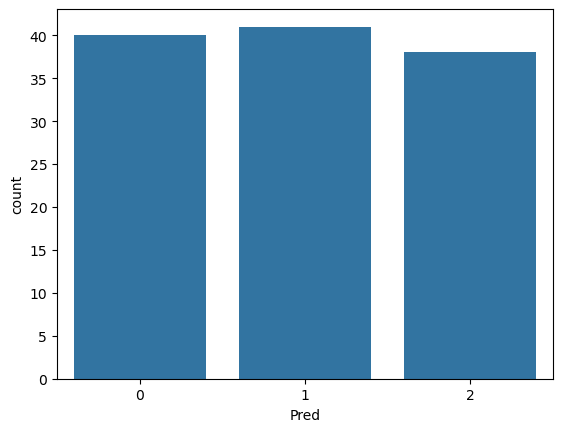

In [8]:
# Ver la distribución de las clases
sns.countplot(x='Pred', data=df)

Vemos que nuestros datos están bastante balanceados en sus clases por lo que no hay necesidad de emplear técnicas de Oversampling o Undersampling.

In [9]:
# Dividir nuestros datos en conjunto de prueba y entrenamiento
X = df.drop(['Pred'], axis=1) 
y = df['Pred'] # Variable objetivo

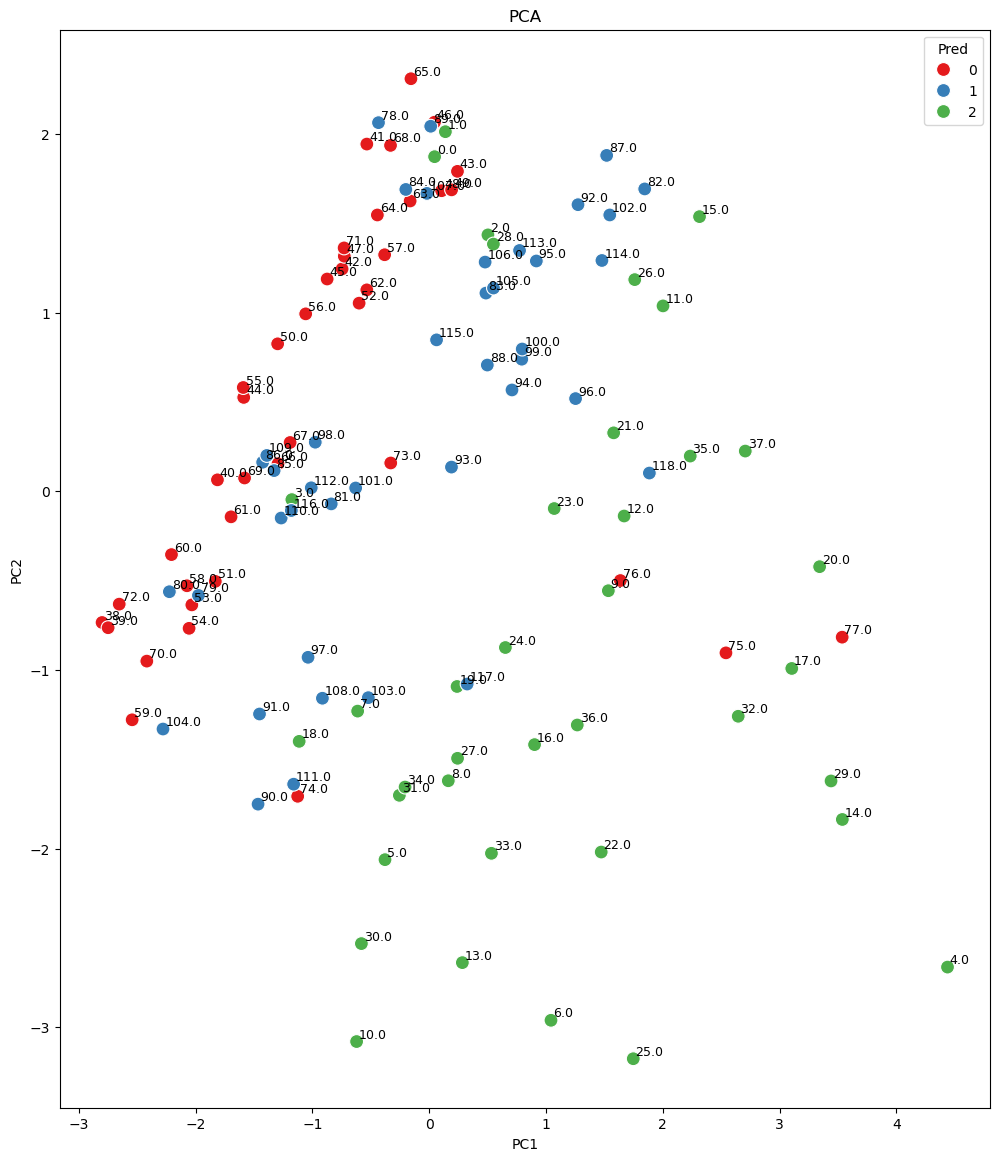

In [10]:
from sklearn.decomposition import PCA

# Centrar los datos 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con 2 componentes para poder graficarlo
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tranformar lo de PCA a un df
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Pred'] = y

# Añadir un indice para poder identificar que fila es del original
pca_df['Index'] = df.index

# Hacer el scatter y a cada punto anotar su indice
plt.figure(figsize=(12,14))
sns.scatterplot(x='PC1', y='PC2', hue='Pred', palette='Set1', data=pca_df, s=100)

for _, row in pca_df.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'] + 0.02, str(row['Index']), fontsize=9)

plt.title('PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Pred')
plt.show()

In [11]:
# Dropear las filas que son ruido
df_clean = df.drop(index=[78, 76, 77, 75, 74, 73, 21, 88, 118, 117, 90, 80, 86, 89, 3, 1, 0])

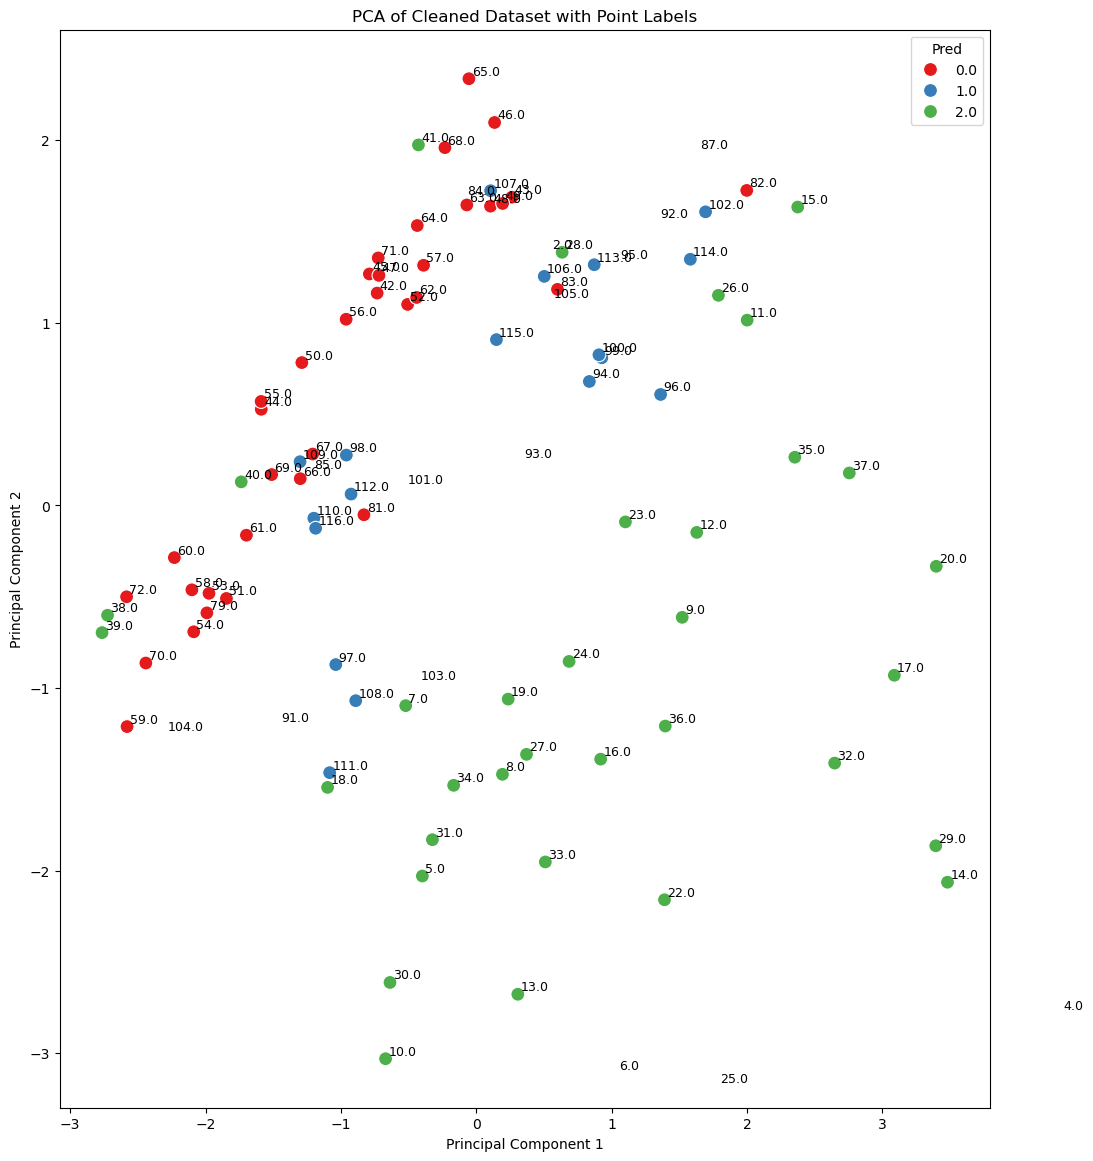

In [12]:
# Volver a separar los datos
X_clean = df_clean.drop('Pred', axis=1)
y_clean = df_clean['Pred']

# Centrarlos
scaler = StandardScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

# Aplicar PCA
pca = PCA(n_components=2)
X_pca_clean = pca.fit_transform(X_scaled_clean)

# Hacerlo dataframe
pca_df_clean = pd.DataFrame(X_pca_clean, columns=['PC1', 'PC2'])
pca_df_clean['Pred'] = y_clean
pca_df_clean['Index'] = df_clean.index  

# Hacer el scatter
plt.figure(figsize=(12,14))
sns.scatterplot(x='PC1', y='PC2', hue='Pred', palette='Set1', data=pca_df_clean, s=100)

for _, row in pca_df_clean.iterrows():
    plt.text(row['PC1'] + 0.02, row['PC2'] + 0.02, str(row['Index']), fontsize=9)

plt.title('PCA of Cleaned Dataset with Point Labels')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Pred')
plt.show()

In [13]:
# Dividirlo en conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=0, stratify=y_clean)

In [14]:
# Escalar los datos
sc = StandardScaler()

# Solo escalar las variables que originalmente eran numéricas
X_train_num = X_train[df_numericas]
X_test_num = X_test[df_numericas]

# Dividir en 2 los datos
X_train_cat = X_train.drop(columns=df_numericas)
X_test_cat = X_test.drop(columns=df_numericas)

# Entrenar y transformar
X_train_sc = pd.DataFrame(sc.fit_transform(X_train_num), columns=df_numericas, index=X_train.index)
X_test_sc = pd.DataFrame(sc.transform(X_test_num), columns=df_numericas, index=X_test.index)

# Juntar ambas partes
X_train_final = pd.concat([X_train_sc,X_train_cat], axis=1)
X_test_final = pd.concat([X_test_sc,X_test_cat], axis=1)

In [16]:
from sklearn.model_selection import GridSearchCV

# Lista de combinaciones válidas para los parámetros
param_grid = [
    {'penalty': ['l2'], 'C': [0.001, 0.01, 0.1, 2, 4, 6, 10], 'solver': ['lbfgs','newton-cg','sag','saga', 'newton-cholesky','liblinear']},
    {'penalty': ['l1'], 'C': [0.001, 0.01, 0.1, 2, 4, 6, 10], 'solver': ['liblinear', 'saga']}]

# Modelo base
logreg = LogisticRegression(max_iter=10000)

# Configurar GridSearchCV
grid = GridSearchCV(logreg, param_grid, cv=5, scoring='f1_macro', verbose=1)

# Ajustar el modelo
grid.fit(X_train_final, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid.best_params_)

# Mostrar el mejor puntaje promedio
print("Mejor puntaje promedio:", grid.best_score_)

# Obtener los resultados de la validación cruzada
cv_results_df = pd.DataFrame(grid.cv_results_)

# Filtrar los resultados del mejor modelo (el de menor 'rank_test_score' es el mejor)
best_mask = cv_results_df['rank_test_score'] == 1

# Extraer los puntajes por cada pliegue (fold) para el mejor conjunto de parámetros
fold_scores = [cv_results_df.loc[best_mask, f'split{i}_test_score'].values[0] for i in range(grid.cv)]

# Imprimir los puntajes por cada pliegue (fold)
for i, score in enumerate(fold_scores):
    print(f'Puntaje del pliegue {i+1}: {score:.4f}')


Fitting 5 folds for each of 56 candidates, totalling 280 fits
Mejores parámetros: {'C': 4, 'penalty': 'l2', 'solver': 'lbfgs'}
Mejor puntaje promedio: 0.8847522847522848
Puntaje del pliegue 1: 0.9394
Puntaje del pliegue 2: 0.8771
Puntaje del pliegue 3: 0.8056
Puntaje del pliegue 4: 0.8690
Puntaje del pliegue 5: 0.9327


In [17]:
# Predecir con el mejor modelo
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_final)

# Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       0.86      0.86      0.86         7
           2       1.00      0.86      0.92         7

    accuracy                           0.90        21
   macro avg       0.91      0.90      0.90        21
weighted avg       0.91      0.90      0.90        21


Matriz de confusión:
[[7 0 0]
 [1 6 0]
 [0 1 6]]


## <font color= #bbc28d> **Caso 2 - Support Vector Machine** </font>

In [18]:
svc_model = SVC()
svc_model.fit(X_train_final, y_train)

y_pred = svc_model.predict(X_test_final)

In [20]:
# Métricas
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.71      0.71      0.71         7
           2       1.00      0.71      0.83         7

    accuracy                           0.81        21
   macro avg       0.83      0.81      0.81        21
weighted avg       0.83      0.81      0.81        21


Matriz de confusión:
[[7 0 0]
 [2 5 0]
 [0 2 5]]
